# Introduction to Pytorch Workflow


In [20]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from torch import nn  #neural networks
print(torch.__version__)

2.7.1+cu118


In [21]:
what_were_covering={
    1:'data preparations and loading', 
    2:'building a model', 
    3:'fitting a model', 
    4:'making predictions and evaluating a model', 
    5:'saving and loading a model', 
    6:'putting a model on GPU'
    }

## 1. Data Preparations and Loading

In [22]:
# creatig Known parameters
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) #unsqueeze to add a dimension
Y=weight*X+bias
print(X[:10],Y[:10],len(X),len(Y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 50 50


### Spliting the dataset to train and test datasets

In [23]:
#create train and test split
train_split=int(0.8*len(X))
X_train, Y_train=X[:train_split], Y[:train_split]
X_test, Y_test=X[train_split:], Y[train_split:]
print(f"X_train: {X_train[:10]}, Y_train: {Y_train[:10]}")
print(f"X_test: {X_test[:10]}, Y_test: {Y_test[:10]}")
print(f"Length of X_train: {len(X_train)}, Length of Y_train: {len(Y_train)}")
print(f"Length of X_test: {len(X_test)}, Length of Y_test: {len(Y_test)}")

X_train: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]), Y_train: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
X_test: tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]), Y_test: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])
Length of X_train: 40, Length of Y_train: 40
Length of X_test: 10, Length of Y_test: 10


### Visualizing Data

In [24]:
def plot_pred(train_data=X_train, train_labels=Y_train,test_data=X_test,test_labels=Y_test,predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
    if predictions is not None:
        if len(predictions) != len(test_data):
            plt.scatter(train_data, predictions, c='r', s=4, label='Predictions')
        else:
            plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size':14})

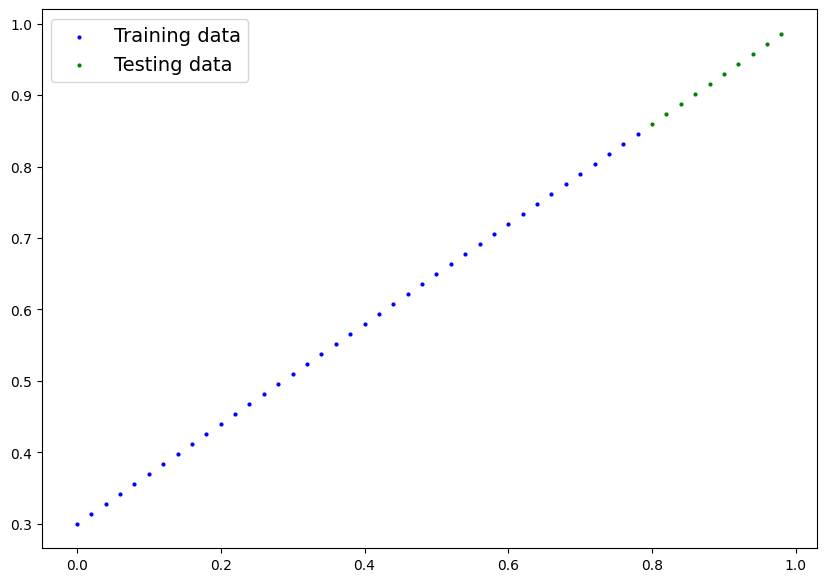

In [25]:
plot_pred()

### Building a Model

using two main Concepts :
1. Gradiant descent
2. Backpropagation

In [48]:
# creating a linear regression model
class LinearRegressionModel(nn.Module): ## almost every th### Building a Model

    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #requires_grad=True means we want to learn the weights
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #requires_grad=True means we want to learn the weights
    def forward(self,x:torch.tensor)->torch.tensor:
        return self.weights*x+self.bias #this is linear rigression formulation

### Pytorch model building Essentials

1. **torch.nn** => contains all the computational graphs
2. **torch.nn.Parameter** => parameters that the odel needs and change
3. **torch.nnn.Module** => base class for all the models in pytorch
4. **torch.optim** => they will help with gradient descent for reducting errors
5. **def forward()** =>all nn.module subclasses need this to get what this model doing


In [59]:
torch.manual_seed(42)
#creatig a instance of the model
model_0=LinearRegressionModel()
#checking the model parameters
print(model_0) 
print(list(model_0.parameters()))

LinearRegressionModel()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [60]:
#linst the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using torch.inference_mode()

In [61]:
with torch.inference_mode():# inference mode is used for making predictions without tracking gradients
    y_preds=model_0(X_test)

# with torch.no_grad():  # no_grad is used for making predictions without tracking gradients
#     y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [62]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

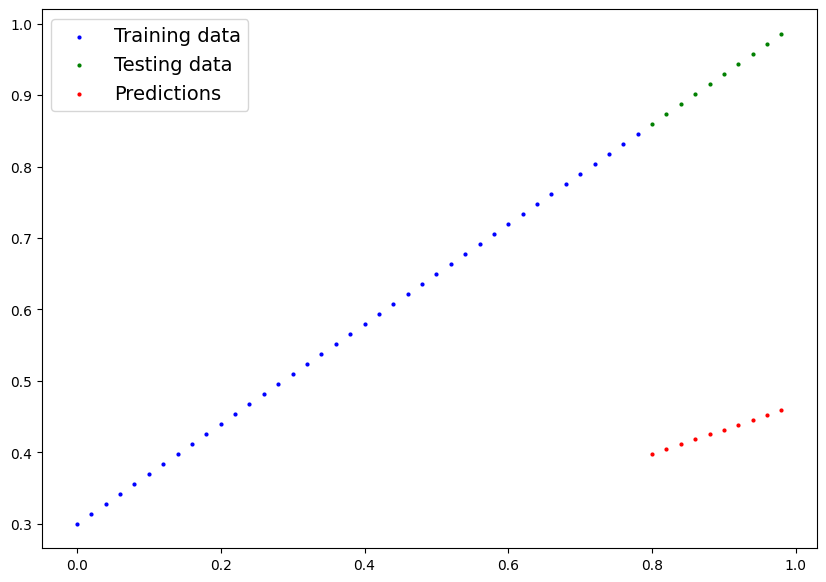

In [63]:
plot_pred(predictions=y_preds)

### Training Model using loss funtion and Optimizer

In [64]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [65]:
loss_fn=nn.L1Loss()#loss function for regression
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)# Stochastic Gradient Descent optimizer 



### Building a training loop and testing loop

Epoch: 1 | Loss: 0.31288138031959534
Epochs: 1 | Test Loss: 0.48106518387794495
Epoch: 2 | Loss: 0.3013603389263153
Epochs: 2 | Test Loss: 0.4675942063331604
Epoch: 3 | Loss: 0.28983935713768005
Epochs: 3 | Test Loss: 0.4541231691837311
Epoch: 4 | Loss: 0.2783183455467224
Epochs: 4 | Test Loss: 0.44065219163894653
Epoch: 5 | Loss: 0.26679736375808716
Epochs: 5 | Test Loss: 0.4271811842918396
Epoch: 6 | Loss: 0.2552763521671295
Epochs: 6 | Test Loss: 0.41371020674705505
Epoch: 7 | Loss: 0.24375534057617188
Epochs: 7 | Test Loss: 0.40023916959762573
Epoch: 8 | Loss: 0.23223432898521423
Epochs: 8 | Test Loss: 0.3867681920528412
Epoch: 9 | Loss: 0.22071333229541779
Epochs: 9 | Test Loss: 0.37329721450805664
Epoch: 10 | Loss: 0.20919232070446014
Epochs: 10 | Test Loss: 0.3598262071609497
Model parameters: OrderedDict({'weights': tensor([0.3757]), 'bias': tensor([0.2288])})
Epoch: 11 | Loss: 0.1976713240146637
Epochs: 11 | Test Loss: 0.3463551998138428
Epoch: 12 | Loss: 0.18615034222602844
E

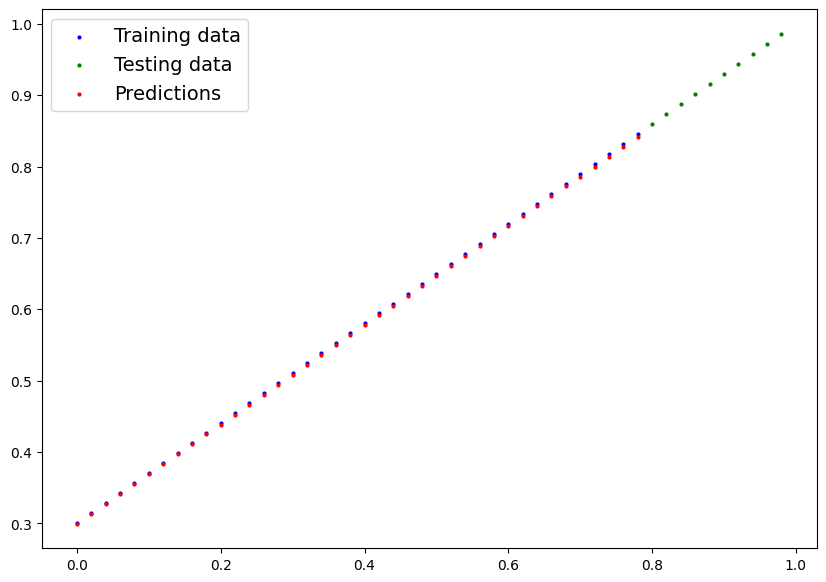

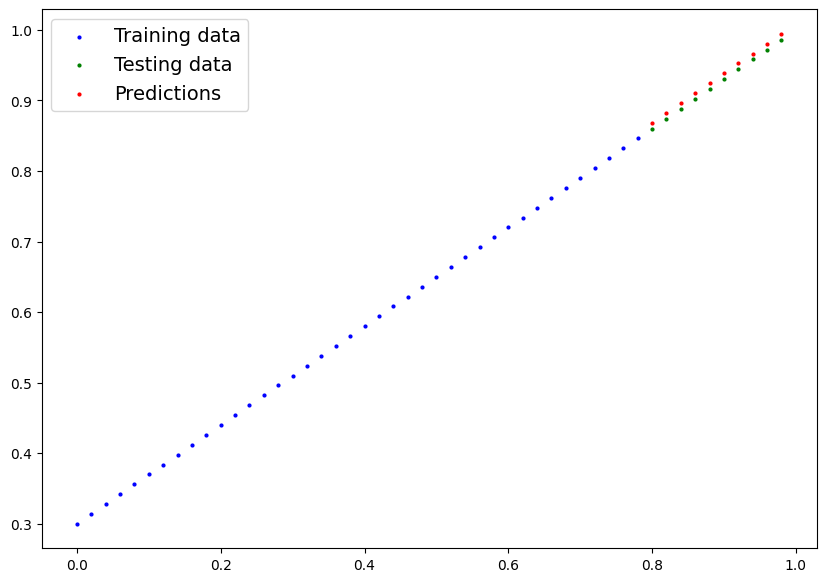

In [66]:
torch.manual_seed(42) #set the random seed for reproducibility
epochs=170

#tracking different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
    model_0.train() #train the model
    y_pred=model_0(X_train) #make predictions on the training data
    loss=loss_fn(y_pred,Y_train) #calculate the loss
    print(f"Epoch: {epoch+1} | Loss: {loss.item()}") #print the loss
    #print the model parameters
    optimizer.zero_grad() #zero the gradients
    loss.backward() #backpropagation
    optimizer.step() #update the weights
    model_0.eval() #set the model to evaluation mode 
    

    ##Testing code
    with torch.inference_mode():# inference mode is used for making predictions without tracking gradients
        y_preds=model_0(X_test)
        test_loss=loss_fn(y_preds,Y_test)
        print(f'Epochs: {epoch+1} | Test Loss: {test_loss.item()}') #print the test loss
        if epoch % 10 == 9:
            epoch_count.append(epoch+1)
            loss_values.append(loss.item())
            test_loss_values.append(test_loss.item())
            print(f"Model parameters: {model_0.state_dict()}") #print the model parameters
plot_pred(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=y_pred.detach().numpy() ) #plot the predictions
plot_pred(predictions=y_preds)

In [67]:
weight, bias

(0.7, 0.3)

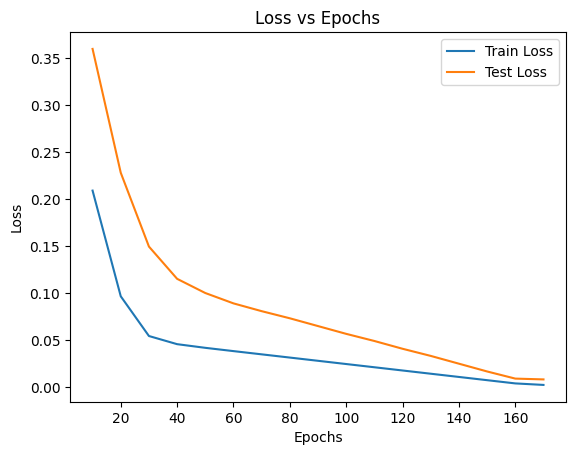

In [68]:
plt.plot(epoch_count,loss_values, label='Train Loss')
plt.plot(epoch_count,test_loss_values, label='Test Loss')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()